In [1]:
#**Data Preprocessing:** In this section, you will become more familiar with the project's data, and a series of preparation and preprocessing steps will be performed on the entire dataset.

#**Exploration:** In this step, we answer a series of high-level questions and gain an intuitive understanding of the company's financial information.

#**Market Analysis:** In the third step, we will analyze the sales and distribution locations, examining which countries, despite having many customers, experience low sales.

#**Customer Valuation:** In this step, we introduce a practical metric called RFM and, based on this metric, divide the company's customers into 7 categories, each with its own marketing meaning and behavior.

#**Customer Retention Analysis:** In the final step, we aim to determine the percentage of customers who make purchases from the company in the months following their first purchase.

In [2]:
#In the first step of the final project, you will apply a series of preprocessing steps to the data to prepare a higher-quality dataset for the subsequent stages of the project. Additionally, you will answer some analytical questions based on these steps.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

In [5]:
df = pd.read_excel("./sales.xlsx")

In [14]:
#df.head(30)
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  525461 non-null  object        
 1   ProductCode    525461 non-null  object        
 2   ProductName    522533 non-null  object        
 3   Quantity       525461 non-null  int64         
 4   InvoiceDate    525461 non-null  datetime64[ns]
 5   UnitPrice      525461 non-null  float64       
 6   CustomerId     417534 non-null  float64       
 7   Country        525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [9]:
#First, remove the rows where the `CustomerId` is missing. Perform this operation on a copy of the DataFrame named `df_no_missing_CustomerId`.

In [10]:
df_no_missing_CustomerId = df.copy()

In [11]:
df_no_missing_CustomerId.dropna(subset='CustomerId', inplace=True)

In [12]:
df_no_missing_CustomerId.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
#df_no_missing_CustomerId.info()

In [17]:
#Next, from the rows where all values are identical, keep only one row. We Perform this operation on a copy of the previous DataFrame, naming it `df_no_duplicate`.

In [22]:
df_no_duplicate = df_no_missing_CustomerId.copy()

In [23]:
df_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  417534 non-null  object        
 1   ProductCode    417534 non-null  object        
 2   ProductName    417534 non-null  object        
 3   Quantity       417534 non-null  int64         
 4   InvoiceDate    417534 non-null  datetime64[ns]
 5   UnitPrice      417534 non-null  float64       
 6   CustomerId     417534 non-null  float64       
 7   Country        417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [26]:
#df_no_duplicate
df_no_duplicate.drop_duplicates(inplace=True)
df_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  410763 non-null  object        
 1   ProductCode    410763 non-null  object        
 2   ProductName    410763 non-null  object        
 3   Quantity       410763 non-null  int64         
 4   InvoiceDate    410763 non-null  datetime64[ns]
 5   UnitPrice      410763 non-null  float64       
 6   CustomerId     410763 non-null  float64       
 7   Country        410763 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


In [27]:
#Also,we remove the rows where the UnitPrice is zero or a negative number. In other words, keep only the rows where the price is positive. Perform this operation on a copy of the previous DataFrame, naming it df_no_missing_price.

In [28]:
df_no_missing_price = df_no_duplicate.copy()

In [29]:
df_no_missing_price = df_no_missing_price[df_no_missing_price.UnitPrice > 0]

In [31]:
#Now, based on the data obtained in the previous step (the DataFrame `df_no_missing_price`), calculate what percentage of the total orders have been canceled, and store the rounded value in a variable called `percentage_cancelled_orders`.

In [33]:
percentage_cancelled_orders = round(100*df_no_missing_price[df_no_missing_price.InvoiceNumber.str.startswith("C", na=False)].InvoiceNumber.nunique()/df_no_missing_price.InvoiceNumber.nunique())
print(percentage_cancelled_orders)

19


In [34]:
#In this part, using the DataFrame `df_no_missing_price`, identify the five customers with the highest number of canceled orders.We store their IDs in a list, in descending order, in the variable `top_cancelling_customers`.

In [38]:

df_tmp = df_no_missing_price.copy()
df_tmp.CustomerId = df_tmp.CustomerId.apply(lambda id: str(int(id)))

top_cancelling_customers = df_tmp[df_tmp.InvoiceNumber.str.startswith("C", na=False)].groupby("CustomerId")["InvoiceNumber"].nunique().reset_index(name='count').sort_values(['count'], ascending=False).head(5)
top_cancelling_customers

,CustomerId,count
845,14911,65
720,14527,39
963,15311,37
599,14156,36
1693,17841,35


In [39]:
top_cancelling_customers = list(top_cancelling_customers.CustomerId)
print(top_cancelling_customers)

['14911', '14527', '15311', '14156', '17841']


In [40]:
#Now, as the final step of preprocessing,we remove the rows corresponding to the canceled orders from the DataFrame. Use a copy of the DataFrame `df_no_missing_price` for this task, naming it `df_no_canceled_orders`.

In [44]:
df_no_canceled_invoice = df_no_missing_price.copy()

In [45]:
df_no_canceled_invoice = df_no_canceled_invoice[~df_no_canceled_invoice.InvoiceNumber.str.startswith("C", na=False)]

In [46]:
df_no_canceled_invoice.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [47]:
#Now,we save the preprocessed DataFrame to a file named `preprocessed_sales.csv` so that this dataset can be used in the subsequent steps of the project.

In [49]:
df_no_canceled_invoice.to_csv("preprocessed_sales.csv", index=False)

In [106]:
#In this step of the project, you'll conduct a deeper analysis of the orders and, by answering
#a few questions and creating some charts, you'll gain a better understanding of the company's financial information.

In [50]:
df =pd.read_csv('./preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [51]:
#How many invoices remain?

In [52]:
number_of_orders = df['InvoiceNumber'].nunique()

In [53]:
number_of_orders

19213

In [54]:
#In what time period was this data collected? Store your answer as a tuple in the variable window_period, 
#which should include the earliest and latest times, in that order. For example, 
#if the earliest time is 2008-04-05 18:20:00 and the latest time is 2010-11-19 20:40:00,
#then the variable should be set as follows:

In [55]:
window_period = (df['InvoiceDate'].min(), df['InvoiceDate'].max())
window_period

('2009-12-01 07:45:00', '2010-12-09 20:01:00')

In [56]:
#Using a bar chart, show the number of unique invoices issued on each day of the week (Monday, Tuesday, etc.). 
#To do this, first identify the day of the week on which each transaction occurred, then calculate the number of unique invoices issued on each day of the week.

Text(0.5, 1.0, 'Number of orders for different Days')

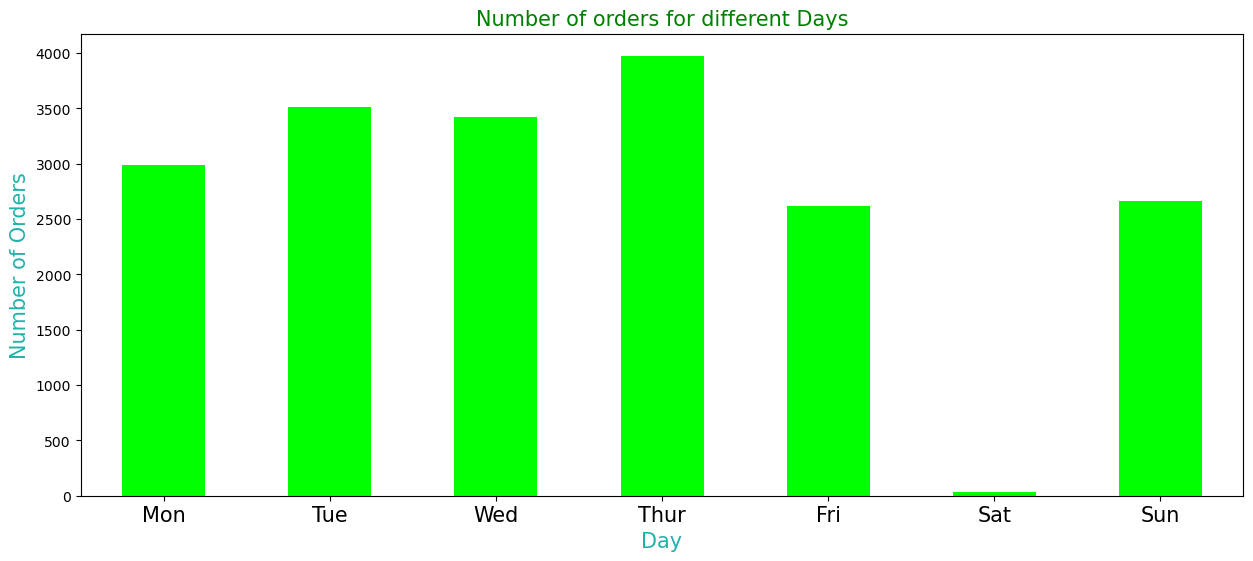

In [59]:
fig1, ax1 = plt.subplots(figsize=(15, 6))

df['day_of_week'] = pd.to_datetime(df["InvoiceDate"]).dt.day_of_week

df.groupby('day_of_week')['InvoiceNumber'].nunique().sort_index().plot(ax=ax1, kind="bar", color="lime")

days = ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun')
ax1.set_xticklabels(days, rotation=0, size=15)

ax1.set_xlabel('Day', color='lightseagreen', size=15)
ax1.set_ylabel('Number of Orders', color='lightseagreen', size=15)
ax1.set_title('Number of orders for different Days', color='green', size=15)


In [60]:
#Now, create a bar chart showing the total sales for each month of each year.
#Note that the total sales for each row in the DataFrame is calculated by multiplying the unit price (`UnitPrice` column) by the quantity of the product (`Quantity` column).

Text(0.5, 1.0, 'Number of orders for different Months')

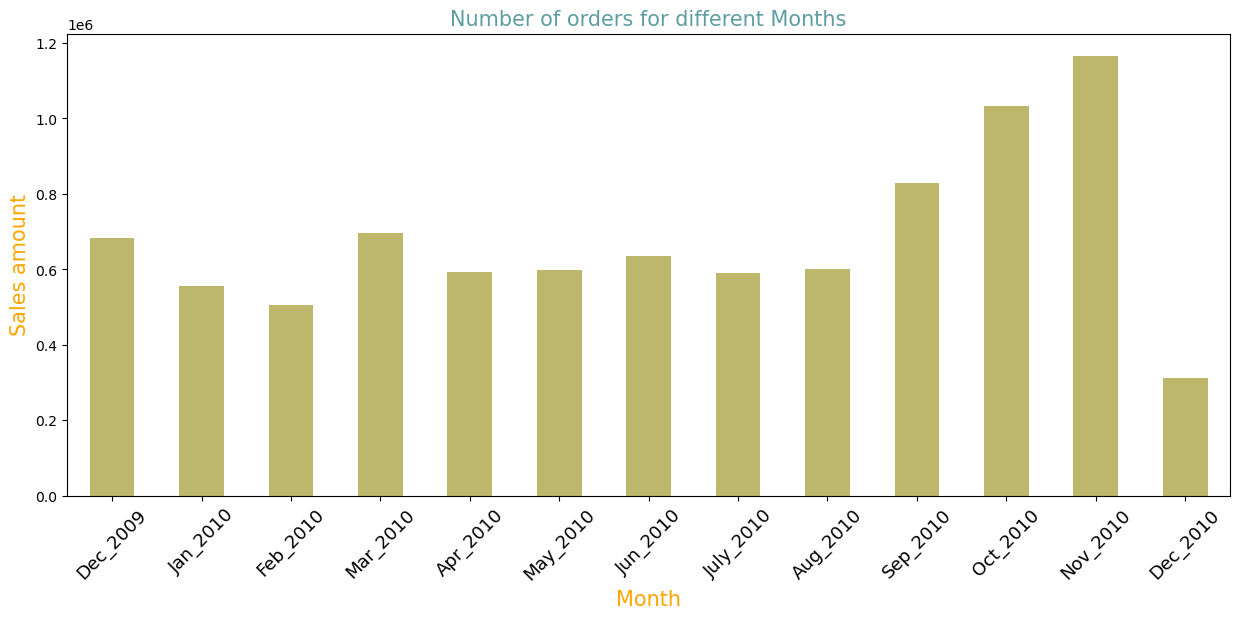

In [61]:
fig2, ax2 = plt.subplots(figsize=(15, 6))

# create a new column for the total price of each row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# extract the month and year from the InvoiceDate column
df['month_year'] = pd.to_datetime(df["InvoiceDate"].sort_values()).dt.strftime("%b_%Y")

# group by month and year and sum the total price
df.groupby('month_year', sort=False)['TotalPrice'].sum().plot(ax=ax2, kind="bar", color="darkkhaki")

# set the xticklabels to the month and year and change the jul_2010 label
labels = ax2.get_xticklabels()
labels[7] = "July_2010"
ax2.set_xticklabels(labels, rotation=45, size=13)

# set the labels and title
ax2.set_xlabel("Month", size=15, color="orange")
ax2.set_ylabel("Sales amount", size=15, color="orange")
ax2.set_title("Number of orders for different Months", color="cadetblue", size=15)

In [62]:
#Step 3

In [64]:
#In this step of the project, you will group the countries based on sales volume and the number of customers. 
#You will then analyze the sales and distribution by plotting a relevant chart to gain insights into the sales and distribution locations.

In [65]:
df = pd.read_csv('./preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [66]:
df_without_uk = df.drop(df[df['Country'] == 'United Kingdom'].index)
# df_without_uk
# sales_by_country = df_without_uk.groupby('Country')[['Quantity', 'UnitPrice']].sum()
# sales_by_country

df_without_uk['TotalSales'] = df_without_uk['Quantity'] * df_without_uk['UnitPrice']
sales_by_country = df_without_uk.groupby('Country')['TotalSales'].sum()
# sales_by_country
customer_count_by_country = df_without_uk.groupby('Country')['CustomerId'].nunique()
# customer_count_by_country
# sales_by_country['TotalSales'] = sales_by_country['Quantity'] * sales_by_country['UnitPrice']
# sales_by_country['TotalSales']
country_stats = pd.concat([customer_count_by_country, sales_by_country], axis=1)
country_stats = country_stats.reset_index()
country_stats.columns = ['Country', 'CustomerCount', 'TotalSales']


customer_count_q3 = country_stats['CustomerCount'].quantile(0.75)
sales_q3 = country_stats['TotalSales'].quantile(0.75)

In [67]:
country_stats

,Country,CustomerCount,TotalSales
0,Australia,15,31446.800
1,Austria,10,13414.330
2,Bahrain,2,805.970
3,Belgium,17,24537.580
4,Brazil,1,268.270
5,Canada,1,1216.660
6,Channel Islands,11,24546.320
7,Cyprus,7,11347.100
8,Denmark,9,50906.850
9,EIRE,5,356041.860


In [69]:
plt.style.use('fivethirtyeight')

In [70]:
country_stats['Group'] = ''
country_stats.loc[(country_stats['CustomerCount'] > customer_count_q3) & (country_stats['TotalSales'] > sales_q3), 'Group'] = 'Highest customer & revenue'
country_stats.loc[(country_stats['CustomerCount'] > customer_count_q3) & (country_stats['TotalSales'] < sales_q3), 'Group'] = 'High customer & low revenue'
country_stats.loc[(country_stats['CustomerCount'] < customer_count_q3) & (country_stats['TotalSales'] > sales_q3), 'Group'] = 'High revenue & low customer'
country_stats.loc[(country_stats['CustomerCount'] < customer_count_q3) & (country_stats['TotalSales'] < sales_q3), 'Group'] = 'Low customer & revenue'

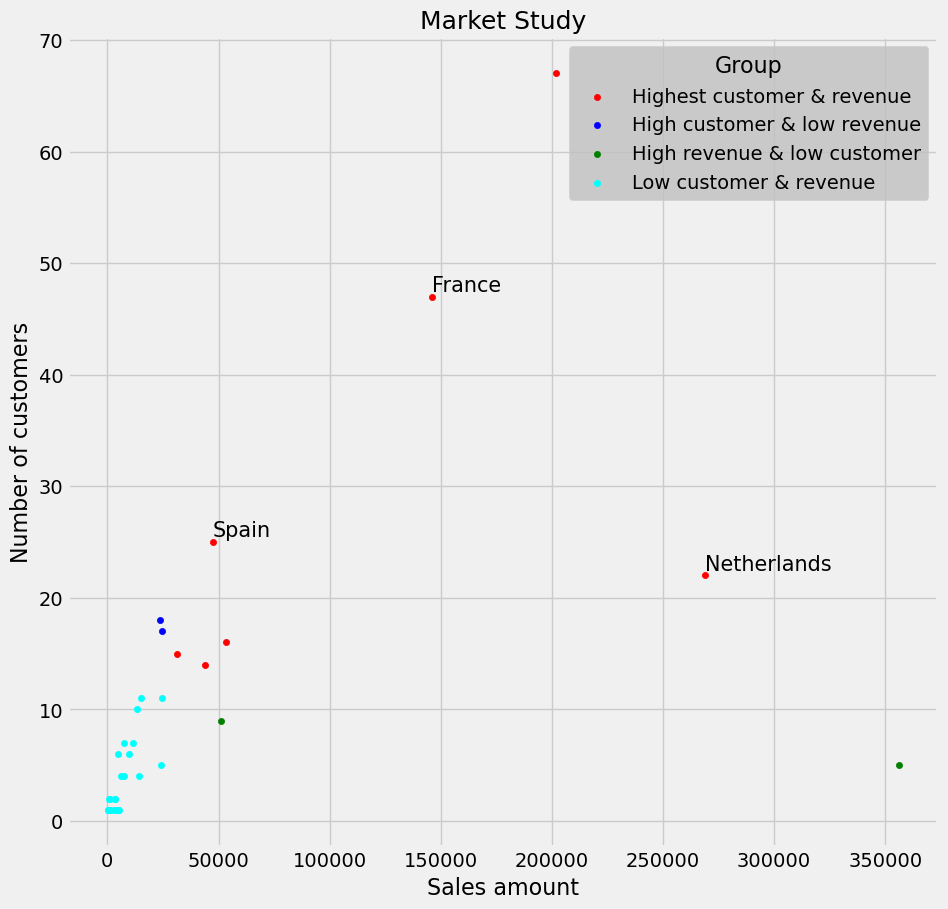

In [73]:

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(country_stats[country_stats.Group=='Highest customer & revenue']['TotalSales'],
           country_stats[country_stats.Group=='Highest customer & revenue']['CustomerCount'],
           color='red', s=20, label='Highest customer & revenue')

ax.scatter(country_stats[country_stats.Group=='High customer & low revenue']['TotalSales'],
           country_stats[country_stats.Group=='High customer & low revenue']['CustomerCount'],
           color='blue', s=20, label='High customer & low revenue')

ax.scatter(country_stats[country_stats.Group=='High revenue & low customer']['TotalSales'],
           country_stats[country_stats.Group=='High revenue & low customer']['CustomerCount'],
           color='green', s=20, label='High revenue & low customer')
           
ax.scatter(country_stats[country_stats.Group=='Low customer & revenue']['TotalSales'],
           country_stats[country_stats.Group=='Low customer & revenue']['CustomerCount'],
           color='cyan', s=20, label='Low customer & revenue')

ax.set_xlabel('Sales amount',size=16)
ax.set_ylabel('Number of customers',size=16)
ax.set_title('Market Study',size=18)

ax.grid(True)

ax.legend(loc='upper right',title='Group', frameon=True, title_fontsize=16, facecolor='silver', fontsize=14)

for index, row in country_stats.iterrows():
    if row['Country'] == 'France':
        ax.text(x=row['TotalSales'], y=row['CustomerCount']+0.5, s='France', fontsize=15)
    if row['Country'] == 'Spain':
        ax.text(x=row['TotalSales'], y=row['CustomerCount']+0.5, s='Spain', fontsize=15)
    if row['Country'] == 'Netherlands':
        ax.text(x=row['TotalSales'], y=row['CustomerCount']+0.5, s='Netherlands', fontsize=15)
                

plt.show()


In [107]:
#Step4

In [ ]:
#**Continuing with marketing tasks, in this step, you need to categorize customers based on their 
#value to the company. To do this, you'll use a well-known method in customer behavior analysis 
#called RFM. In this method, three metrics are calculated for each customer:**

#- **Recency:** The number of days since the customer's last purchase.
#- **Frequency:** The number of times the customer has made a purchase.
#- **Monetary Value:** The total revenue the company has generated from a customer.

#**These metrics represent important indicators of customer behavior.
#For example, the more recent a customer's purchase, the more likely they are to buy again.
#The more frequently a customer purchases, the higher their satisfaction likely is. 
#Additionally, the revenue generated by a customer can distinguish them from other buyers.**

In [87]:
# Recency criterion

In [75]:
#First, you need to calculate the Recency metric for each customer (CustomerId). To compute this metric,
#determine the number of days that have passed since the customer's last purchase compared to one day after the
#latest date available in the dataset (from the InvoiceDate column). This is based on the assumption that you are performing the analysis on this particular day.

In [78]:
last_date = df['InvoiceDate'].max()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

last_date = df['InvoiceDate'].max()

last_day = last_date + pd.Timedelta(days=1)

df['Recency'] = (last_day - df['InvoiceDate']).dt.days

recency_df = df.groupby('CustomerId')['Recency'].min()

print(recency_df)

CustomerId
12346.0    165
12347.0      3
12348.0     74
12349.0     43
12351.0     11
          ... 
18283.0     18
18284.0     67
18285.0    296
18286.0    112
18287.0     18
Name: Recency, Length: 4312, dtype: int64


In [79]:
#Now, for each customer, you can find the date of their most recent purchase and calculate the number of days since the `last_day`. 

#Store the results in a DataFrame named `df_customer_segments` with two columns: `CustomerId` (the customer identifier) and `Recency` (the calculated recency value).

In [80]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

last_date = df['InvoiceDate'].max()

last_day = last_date + pd.Timedelta(days=1)

df_customer_segments = df.groupby('CustomerId')['InvoiceDate'].max().reset_index()
df_customer_segments['Recency'] = (last_day - df_customer_segments['InvoiceDate']).dt.days

print(df_customer_segments)

      CustomerId         InvoiceDate  Recency
0        12346.0 2010-06-28 13:53:00      165
1        12347.0 2010-12-07 14:57:00        3
2        12348.0 2010-09-27 14:59:00       74
3        12349.0 2010-10-28 08:23:00       43
4        12351.0 2010-11-29 15:23:00       11
...          ...                 ...      ...
4307     18283.0 2010-11-22 15:30:00       18
4308     18284.0 2010-10-04 11:33:00       67
4309     18285.0 2010-02-17 10:24:00      296
4310     18286.0 2010-08-20 11:57:00      112
4311     18287.0 2010-11-22 11:51:00       18

[4312 rows x 3 columns]


In [85]:
#Frequency criterion

In [82]:
#Now you need to calculate how many unique purchases each customer has made so far.
#Store the result in a column named `Frequency` and add it to the `df_customer_segments` DataFrame.

In [83]:
df_customer_segments['Frequency'] = df.groupby('CustomerId')['InvoiceNumber'].nunique().values

print(df_customer_segments)

      CustomerId         InvoiceDate  Recency  Frequency
0        12346.0 2010-06-28 13:53:00      165         11
1        12347.0 2010-12-07 14:57:00        3          2
2        12348.0 2010-09-27 14:59:00       74          1
3        12349.0 2010-10-28 08:23:00       43          3
4        12351.0 2010-11-29 15:23:00       11          1
...          ...                 ...      ...        ...
4307     18283.0 2010-11-22 15:30:00       18          6
4308     18284.0 2010-10-04 11:33:00       67          1
4309     18285.0 2010-02-17 10:24:00      296          1
4310     18286.0 2010-08-20 11:57:00      112          2
4311     18287.0 2010-11-22 11:51:00       18          4

[4312 rows x 4 columns]


In [84]:
#Monetary Value criterion

In [89]:
#For this criterion, you need to calculate the total purchase amount for each customer.
#Note that to calculate the revenue for each row, you should multiply the unit price (UnitPrice) by the quantity (Quantity).
#Use the result to calculate the total purchase amount for each customer. 
#Store the result in a column named MonetaryValue in the dataframe df_customer_segments.

In [90]:

df['TotalValue'] = df['UnitPrice'] * df['Quantity']
df_customer_segments['MonetaryValue'] = df.groupby('CustomerId')['TotalValue'].sum().values

print(df_customer_segments)

      CustomerId         InvoiceDate  Recency  Frequency  MonetaryValue
0        12346.0 2010-06-28 13:53:00      165         11         372.86
1        12347.0 2010-12-07 14:57:00        3          2        1323.32
2        12348.0 2010-09-27 14:59:00       74          1         222.16
3        12349.0 2010-10-28 08:23:00       43          3        2671.14
4        12351.0 2010-11-29 15:23:00       11          1         300.93
...          ...                 ...      ...        ...            ...
4307     18283.0 2010-11-22 15:30:00       18          6         619.37
4308     18284.0 2010-10-04 11:33:00       67          1         461.68
4309     18285.0 2010-02-17 10:24:00      296          1         427.00
4310     18286.0 2010-08-20 11:57:00      112          2        1296.43
4311     18287.0 2010-11-22 11:51:00       18          4        2345.71

[4312 rows x 5 columns]


In [91]:
#Grouping Each Criterion

#Now, you need to divide each of the three criteria (Recency, Frequency, and MonetaryValue) into four different groups based on 
#the first, second, and third quartiles, as follows:

In [92]:
R_quartiles = np.quantile(df_customer_segments['Recency'], [0.25, 0.5, 0.75])
F_quartiles = np.quantile(df_customer_segments['Frequency'], [0.25, 0.5, 0.75])
M_quartiles = np.quantile(df_customer_segments['MonetaryValue'], [0.25, 0.5, 0.75])


In [93]:

df_customer_segments['R_quartile'] = np.select(
    [df_customer_segments['Recency'] <= R_quartiles[0], 
     (R_quartiles[0] < df_customer_segments['Recency']) & (df_customer_segments['Recency'] <= R_quartiles[1]), 
     (R_quartiles[1] < df_customer_segments['Recency']) & (df_customer_segments['Recency'] <= R_quartiles[2]), 
     df_customer_segments['Recency'] > R_quartiles[2]], 
    [1, 2, 3, 4], default=0)

df_customer_segments['F_quartile'] = np.select(
    [df_customer_segments['Frequency'] <= F_quartiles[0], 
     (F_quartiles[0] < df_customer_segments['Frequency']) & (df_customer_segments['Frequency'] <= F_quartiles[1]), 
     (F_quartiles[1] < df_customer_segments['Frequency']) & (df_customer_segments['Frequency'] <= F_quartiles[2]), 
     df_customer_segments['Frequency'] > F_quartiles[2]], 
    [1, 2, 3, 4], default=0)

df_customer_segments['M_quartile'] = np.select(
    [df_customer_segments['MonetaryValue'] <= M_quartiles[0], 
     (M_quartiles[0] < df_customer_segments['MonetaryValue']) & (df_customer_segments['MonetaryValue'] <= M_quartiles[1]), 
     (M_quartiles[1] < df_customer_segments['MonetaryValue']) & (df_customer_segments['MonetaryValue'] <= M_quartiles[2]), 
     df_customer_segments['MonetaryValue'] > M_quartiles[2]], 
    [1, 2, 3, 4], default=0)

print(df_customer_segments.head())

   CustomerId         InvoiceDate  Recency  Frequency  MonetaryValue  \
0     12346.0 2010-06-28 13:53:00      165         11         372.86   
1     12347.0 2010-12-07 14:57:00        3          2        1323.32   
2     12348.0 2010-09-27 14:59:00       74          1         222.16   
3     12349.0 2010-10-28 08:23:00       43          3        2671.14   
4     12351.0 2010-11-29 15:23:00       11          1         300.93   

   R_quartile  F_quartile  M_quartile  
0           4           4           2  
1           1           2           3  
2           3           1           1  
3           2           3           4  
4           1           1           1  


In [94]:
#RFM Criterion


In [95]:
df_customer_segments['RFM'] = (df_customer_segments['R_quartile'].astype(str) + 
                               df_customer_segments['F_quartile'].astype(str) + 
                               df_customer_segments['M_quartile'].astype(str)).astype(int)

print(df_customer_segments.head())

   CustomerId         InvoiceDate  Recency  Frequency  MonetaryValue  \
0     12346.0 2010-06-28 13:53:00      165         11         372.86   
1     12347.0 2010-12-07 14:57:00        3          2        1323.32   
2     12348.0 2010-09-27 14:59:00       74          1         222.16   
3     12349.0 2010-10-28 08:23:00       43          3        2671.14   
4     12351.0 2010-11-29 15:23:00       11          1         300.93   

   R_quartile  F_quartile  M_quartile  RFM  
0           4           4           2  442  
1           1           2           3  123  
2           3           1           1  311  
3           2           3           4  234  
4           1           1           1  111  


In [96]:
#Customer grouping

In [97]:
#Now, based on the values in the `RFM` column, you need to group the customers according to the 
#following table and store the name of their group in a column called `Segment`. 
#Note that in this table, `X` represents any value. For example, `14X` can represent `141`, `142`, `143`, or `144`.

In [98]:

def group_rfm(Value):
    Value = str(Value)
    if Value == "144":
        return "Best"
    elif Value == "344":
        return "AlmostLost"
    elif Value == "444":
        return "LostBigSpenders"
    elif Value == "441":
        return "LostCheap"
    elif Value[1:2] == '4':
        return'Loyal'
    elif Value[2:] == '4':
        return'BigSpenders'
    else:
        return 'Normal'

df_customer_segments['Segment'] = df_customer_segments['RFM'].apply(group_rfm)
df_customer_segments['Segment'] 


0             Loyal
1            Normal
2            Normal
3       BigSpenders
4            Normal
           ...     
4307          Loyal
4308         Normal
4309         Normal
4310         Normal
4311    BigSpenders
Name: Segment, Length: 4312, dtype: object

In [99]:
#Step 5

In [104]:
#Customer Retention Analysis

#Acquiring new customers is usually a challenging and costly task for a company because 
#the marketing team needs to use various advertising methods and customer engagement strategies.
#Therefore, the focus is often on retaining current customers and increasing their loyalty.

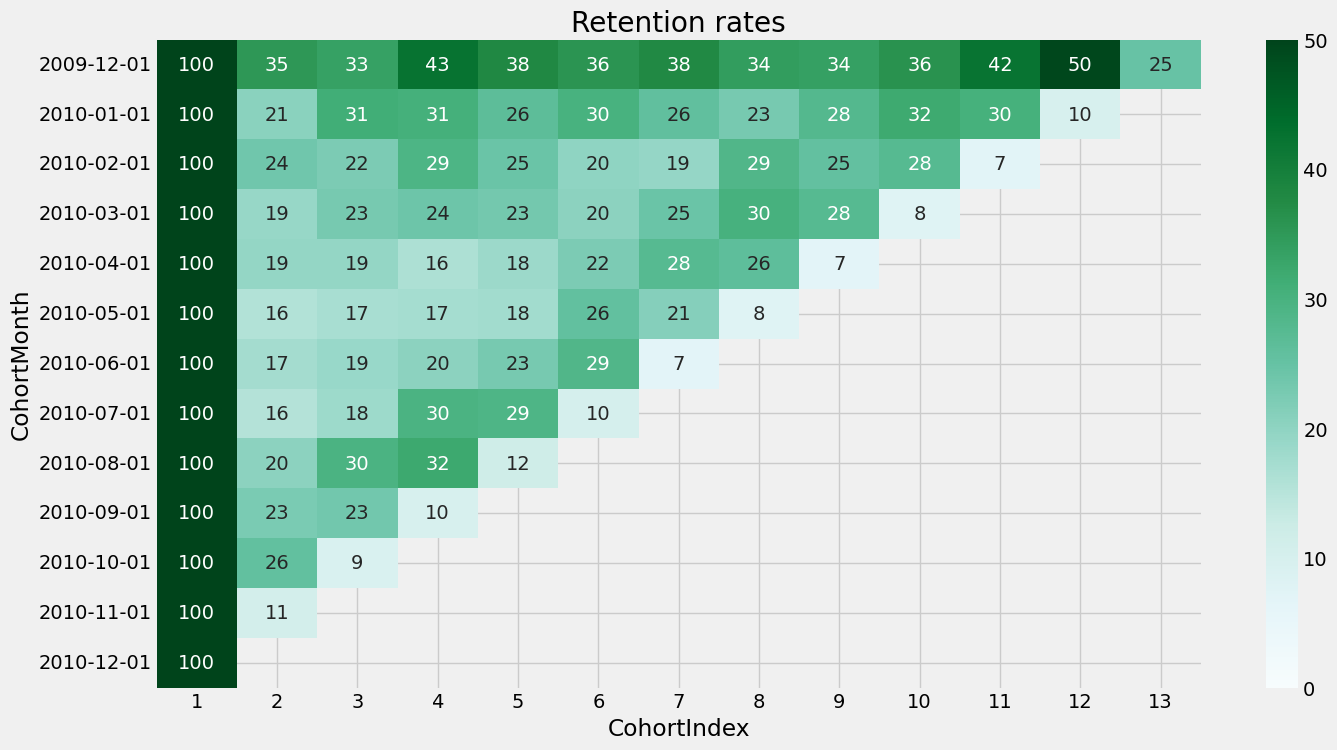

In [102]:
from matplotlib.ticker import MultipleLocator, FixedFormatter
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CohortMonth'] = df.groupby('CustomerId')['InvoiceDate'].transform('min').dt.to_period('M')
df['CohortIndex'] = (df['InvoiceDate'].dt.to_period('M') - df['CohortMonth']).apply(lambda x: x.n)

cohort_data = df.groupby(['CohortMonth', 'CohortIndex']).agg({'CustomerId': 'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerId')
cohort_pivot = cohort_pivot.div(cohort_pivot.iloc[:, 0], axis=0).mul(100)


fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(cohort_pivot, 
            annot=True,  
            cmap='BuGn', 
            fmt='.0f', 
            vmin=0,  
            vmax=50, 
            ax=ax)

ax.set_title('Retention rates')

ax.set_xlabel('CohortIndex')

ax.set_yticklabels([f"{period.year}-{period.month:02d}-01" for period in cohort_pivot.index])
ax.set_xticklabels((cohort_pivot.columns + 1).map(str))
plt.show()
